# Data Loading and Preprocessing

In [72]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualization settings
sns.set_context("notebook", font_scale=1.5)

# Load the dataset
file_path = 'data/Dataset4_EWS.xlsx'


## Real-World dataset

From Bloomberg, consisting of weekly observations of:

- Market and macroeconomic indicators (e.g., indices, rates).
- A response variable `Y` indicating **anomalous periods** (e.g., market stress events).

Data columns: ['Data', 'BDIY', 'CRY', 'Cl1', 'DXY', 'ECSURPUS', 'EMUSTRUU', 'EONIA', 'GBP', 'GT10', 'GTDEM10Y', 'GTDEM2Y', 'GTDEM30Y', 'GTGBP20Y', 'GTGBP2Y', 'GTGBP30Y', 'GTITL10YR', 'GTITL2YR', 'GTITL30YR', 'GTJPY10YR', 'GTJPY2YR', 'GTJPY30YR', 'JPY', 'LF94TRUU', 'LF98TRUU', 'LG30TRUU', 'LMBITR', 'LP01TREU', 'LUACTRUU', 'LUMSTRUU', 'MXBR', 'MXCN', 'MXEU', 'MXIN', 'MXJP', 'MXRU', 'MXUS', 'US0001M', 'USGG2YR', 'USGG30YR', 'USGG3M', 'VIX', 'XAUBGNL', 'Y']
Data shape: (1111, 42)
Total number of records: 1111
Time period: from 01/11/2000 to 04/20/2021
Frequency: W-TUE
Number of variables: 42
Number of anomalies: 237 (21.33%)

Metadata and statistics:


,Ticker,Description,Mean,Std.Dev,Min,Max,Missing values,Missing (%)
0,BDIY,Baltic Dry Index,2259.860486,2017.811888,291.00000,11793.00000,0,0.00%
1,CRY,TR/CC CRB ER Index,245.247649,68.278081,106.29290,467.57000,0,0.00%
2,Cl1,Generic 1st 'CL' Future,60.708101,25.900813,10.01000,140.97000,0,0.00%
3,DXY,DOLLAR INDEX SPOT,90.934982,11.379095,71.32900,119.82000,0,0.00%
4,ECSURPUS,Bloomberg ECO US Surprise Inde,0.036153,0.349453,-0.97400,0.99100,0,0.00%
5,EMUSTRUU,EM USD Aggregate,704.379495,309.951768,230.52670,1286.35300,0,0.00%
6,EONIA,EMMI EURO OverNight Index Aver,1.363676,1.721894,-0.49800,5.73000,0,0.00%
7,GBP,British Pound Spot,1.569618,0.212340,1.17230,2.08520,0,0.00%
8,GT10,US TREASURY N/B,3.266748,1.332464,0.50800,6.74800,0,0.00%
9,GTDEM10Y,BUNDESREPUB. DEUTSCHLAND,2.448365,1.851558,-0.79400,5.64400,0,0.00%


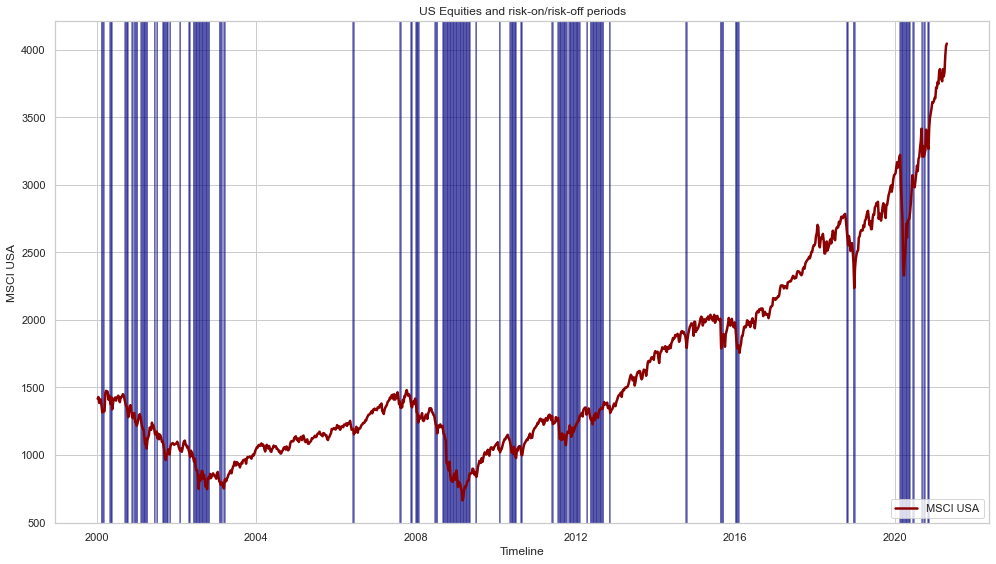

In [73]:
# Set visualization style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]

# Load the data from the Excel file
# First sheet contains market data with dates and anomaly labels, second sheet contains metadata
data_df = pd.read_excel(file_path, sheet_name='Markets')
metadata_df = pd.read_excel(file_path, sheet_name='Metadata')

# Check the structure of the loaded data
print("Data columns:", data_df.columns.tolist())

# Extract date and anomaly label columns
date_col = 'Date' if 'Date' in data_df.columns else data_df.columns[0]
y_col = 'Y' if 'Y' in data_df.columns else None

# Convert dates to datetime format
data_df[date_col] = pd.to_datetime(data_df[date_col], dayfirst=True)  # Date format is dd/mm/yy

# Set date as index
data_df = data_df.set_index(date_col)

# Extract features (all columns except Y if it exists)
if y_col:
    X_df = data_df.drop(y_col, axis=1)
    y = data_df[y_col].values
else:
    X_df = data_df
    y = None

# Display basic information about the dataset
print(f"Data shape: {X_df.shape}")
print(f"Total number of records: {len(X_df)}")
print(f"Time period: from {X_df.index.min().strftime('%m/%d/%Y')} to {X_df.index.max().strftime('%m/%d/%Y')}")
print(f"Frequency: {pd.infer_freq(X_df.index) or 'Weekly'}")
print(f"Number of variables: {X_df.shape[1]}")
if y_col:
    print(f"Number of anomalies: {np.sum(y == 1)} ({np.mean(y == 1)*100:.2f}%)")

# Create a more comprehensive metadata table with additional statistics
enhanced_metadata = []

# Determine the correct column names for ticker and description
ticker_col = 'ticker' if 'ticker' in metadata_df.columns else metadata_df.columns[0]
desc_col = 'description' if 'description' in metadata_df.columns else metadata_df.columns[1] if len(metadata_df.columns) > 1 else ticker_col

for ticker in X_df.columns:
    # Get metadata for this ticker if available
    meta_row = metadata_df[metadata_df[ticker_col] == ticker] if ticker in metadata_df[ticker_col].values else pd.DataFrame()

    # Get description or use ticker if not found
    description = meta_row[desc_col].values[0] if not meta_row.empty and desc_col in meta_row.columns else ticker

    # Calculate statistics for this series
    series = X_df[ticker]

    enhanced_metadata.append({
        'Ticker': ticker,
        'Description': description,
        'Mean': series.mean(),
        'Std.Dev': series.std(),
        'Min': series.min(),
        'Max': series.max(),
        'Missing values': series.isna().sum(),
        'Missing (%)': f"{series.isna().mean()*100:.2f}%"
    })

# Create enhanced metadata dataframe
enhanced_meta_df = pd.DataFrame(enhanced_metadata)

# Display the enhanced metadata
print("\nMetadata and statistics:")
display(enhanced_meta_df)

# Create a plot with anomalies as vertical bars and MXUS as a line
if y_col and 'MXUS' in X_df.columns:
    fig, ax = plt.subplots(figsize=(14, 8))

    # Plot MXUS line
    ax.plot(X_df.index.to_numpy(), X_df['MXUS'].to_numpy(), color='darkred', linewidth=2.5, label='MSCI USA')

    # Get the y-axis limits after plotting MXUS
    y_min, y_max = ax.get_ylim()

    # For each anomaly point (Y=1), create a vertical span across the entire plot
    for i, (date, is_anomaly) in enumerate(zip(X_df.index, y)):
        if is_anomaly == 1:
            ax.axvspan(date, date + pd.Timedelta(days=7), alpha=0.3, color='navy', label='Risk-on/Risk-off' if i == 0 else "")

    # Set labels and title
    ax.set_xlabel('Timeline')
    ax.set_ylabel('MSCI USA')
    ax.set_title('US Equities and risk-on/risk-off periods')

    # Add legend
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc='best')

    plt.tight_layout()
    plt.show()
else:
    print("Either 'Y' column or 'MXUS' column is missing in the dataset.")


## Group the features

The first thing we do is to group the features by macroeconomic category: **Equities, Bonds, Interest rates, Commodities, Currencies** and the economic indicator, ie the 
**Economic surprise index** left as is.

---

#### How we transform the data

The next step is to transform the data, in particular the goal is to perform a **feature selection** within the most numerous groups (Bond, Interest rates, Equity) through the **kernel PCA**. 
- We keep the maximum between: 3 principal components or >80% cumulative explained variance. 
- In this way we have a clear, synthetic, interpretable signal for each category, this allows us to easily handle each category.

Only the **features** are transformed — not the labels, i.e., our vector Y.

<br>

In [74]:
#Group the features
# Define lists of variables by type
# Commodities
commodities = [col for col in X_df.columns if col in ['XAUBGNL', 'CRY', 'Cl1','BDIY']]

# Currencies
currencies = [col for col in X_df.columns if col in ['DXY', 'GBP', 'JPY']]

# Bond Indices
bond_indices = [col for col in X_df.columns if col in ['EMUSTRUU', 'LF94TRUU', 'LF98TRUU', 'LG30TRUU', 'LMBITR', 'LP01TREU', 'LUACTRUU', 'LUMSTRUU']]

# Equity Indices
equity_indices = [col for col in X_df.columns if col in ['MXBR', 'MXCN', 'MXEU', 'MXIN', 'MXJP', 'MXRU', 'MXUS']]

# Volatility Index
volatility_index = [col for col in X_df.columns if col in ['VIX']]

# Interest Rates / Sovereign Yields
interest_rates = [col for col in X_df.columns if col in [
    'EONIA', 'GTDEM10Y', 'GTDEM2Y', 'GTDEM30Y', 'GTGBP20Y', 'GTGBP2Y', 'GTGBP30Y',
    'GTITL10YR', 'GTITL2YR', 'GTITL30YR', 'GTJPY10YR', 'GTJPY2YR', 'GTJPY30YR',
    'US0001M', 'USGG3M', 'USGG2YR', 'GT10', 'USGG30YR'
]]

# Economic Indicator
economic_surprise = [col for col in X_df.columns if col in ['ECSURPUS']]


Processing group: EQ
Selected 3 components for Eq (explaining 70.49% of variance).

Processing group: BOND
Selected 2 components for Bond (explaining 81.41% of variance).

Processing group: IR
Selected 3 components for IR (explaining 69.71% of variance).

Shape of Equity KPCA: (1111, 3)
Shape of Bond KPCA: (1111, 2)
Shape of Interest Rates KPCA: (1111, 3)


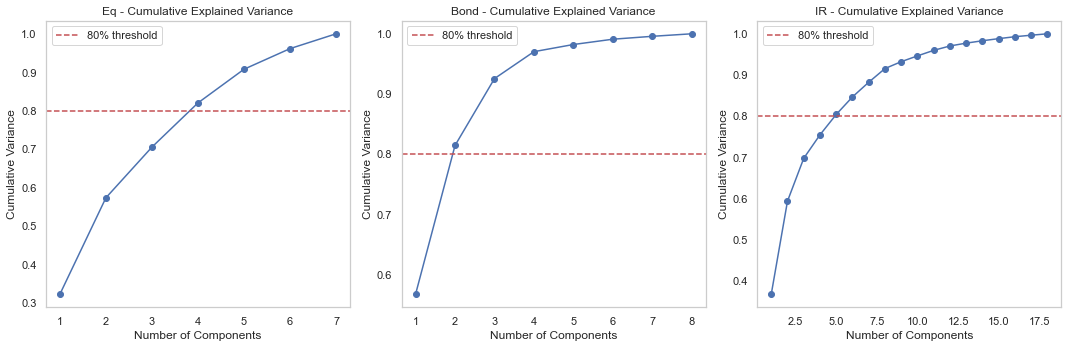

In [75]:
#Kernel PCA
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler

# Groups
groups = {
    'Eq': equity_indices,
    'Bond': bond_indices,
    'IR': interest_rates
}

# Initialize dictionaries
kernel_pca_features = {}
explained_variances = {}

# Loop through each group
for group_abbr, group_columns in groups.items():
    print(f"\nProcessing group: {group_abbr.upper()}")
    
    # Subset the data
    X_group = X_df[group_columns].dropna()
    
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_group)
    
    # Apply Kernel PCA
    kpca = KernelPCA(kernel='rbf', fit_inverse_transform=False, n_components=len(group_columns))
    X_kpca = kpca.fit_transform(X_scaled)
    
    # Calculate approximate explained variance ratio
    lambdas = np.var(X_kpca, axis=0)
    explained_variance_ratio = lambdas / np.sum(lambdas)
    cumulative_variance = np.cumsum(explained_variance_ratio)
    
    # Save explained variance for plotting
    explained_variances[group_abbr] = cumulative_variance
    
    # Determine number of components (max 3 or enough for >80% variance)
    n_components_selected = np.searchsorted(cumulative_variance, 0.8) + 1
    n_components_selected = min(n_components_selected, 3)
    
    print(f"Selected {n_components_selected} components for {group_abbr} (explaining {cumulative_variance[n_components_selected-1]*100:.2f}% of variance).")
    
    # Keep only selected components
    X_kpca_reduced = X_kpca[:, :n_components_selected]
    
    # Create a DataFrame with proper names like Eq_PC1, Eq_PC2, etc.
    component_names = [f"{group_abbr}_PC{i+1}" for i in range(n_components_selected)]
    kernel_pca_features[group_abbr] = pd.DataFrame(X_kpca_reduced, 
                                                    index=X_group.index,
                                                    columns=component_names)

# Now you have a separate dataframe for each group
Eq_kpca = kernel_pca_features['Eq']
Bond_kpca = kernel_pca_features['Bond']
IR_kpca = kernel_pca_features['IR']

# Example prints
print("\nShape of Equity KPCA:", Eq_kpca.shape)
print("Shape of Bond KPCA:", Bond_kpca.shape)
print("Shape of Interest Rates KPCA:", IR_kpca.shape)

# Plot explained variance for each group
plt.figure(figsize=(15,5))

for i, (group_abbr, cumvar) in enumerate(explained_variances.items(), 1):
    plt.subplot(1, 3, i)
    plt.plot(np.arange(1, len(cumvar)+1), cumvar, marker='o')
    plt.axhline(y=0.8, color='r', linestyle='--', label='80% threshold')
    plt.title(f'{group_abbr} - Cumulative Explained Variance')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Variance')
    plt.grid()
    plt.legend()

plt.tight_layout()
plt.show()


# Check of principal components
As we know the kernel PCA leverages **non-linear** combinations of data in order to find the most explicative principal components, this can be **very dangerous**
in time series analysis since it can both **destroy stationarity** and destroy the pecularity of a group, i.e the equity indices are always positive, this may not be **preserved** after kernel PCA, let's plot the first principal component to verify this:

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

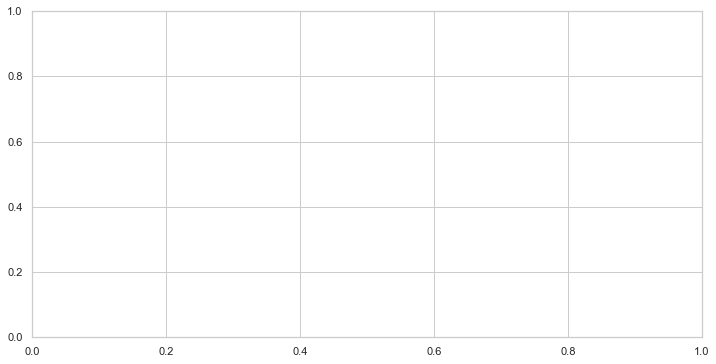

In [76]:
# Analyze the first principal component of equity
from scipy import stats
import statsmodels.api as sm

if 'Eq_PC1' in Eq_kpca.columns:
    # Time plot of levels
    plt.figure(figsize=(12, 6))
    plt.plot(Eq_kpca.index, Eq_kpca['Eq_PC1'])
    plt.title('1st PC of Equity: time plot')
    plt.xlabel('Date')
    plt.ylabel('Index Value')
    plt.tight_layout()
    plt.show()

    # Time plot of log returns
    plt.figure(figsize=(12, 6))
    log_returns = np.diff(np.log(Eq_kpca['Eq_PC1']))
    plt.plot(Eq_kpca.index[1:], log_returns)
    plt.title('1st PC of Equity: time plot of first log-differences (log-returns)')
    plt.xlabel('Date')
    plt.ylabel('Log returns')
    plt.tight_layout()
    plt.show()

    # Histogram of log returns
    plt.figure(figsize=(12, 6))
    plt.hist(log_returns, bins=50, alpha=0.7)
    plt.title('1st PC of Equity: frequency distribution of log-returns')
    plt.xlabel('Log returns')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    # QQ plot of log returns vs Gaussian
    plt.figure(figsize=(12, 6))
    stats.probplot(log_returns, dist="norm", plot=plt)
    plt.title('1st PC of Equity: QQplot of log-returns vs Gaussian')
    plt.tight_layout()
    plt.show()


# Stationarity Transformation

We need the data to be **stationary**.This means that the **joint distribution** of the features (or their principal components) must be stable over time.

The rationale is intuitive:

- We want to use historical data to infer patterns related to systemic risk.
- If the underlying structure shifts over time, any model based on past behavior becomes unreliable.

> A non-stationary model is not just inaccurate — it’s structurally **wrong**.

---

## Coping with stationarity

As we expected, the principal components of the Equity indices can be negative, we clearly can't apply log-differences to it. We **modify approach** by first stationarizing
all the raw time series per group, in this way:

- **Interest rates and yields**: first differences (they can be negative or close to zero).
- **Economic surprise index**: left as is (already roughly stationary). Note: Do not take this as a rule for macroeconomic variables; many are non-stationary, sometimes they need to be differentiated TWICE (sic).
- **All the rest**: log-differenced (they are strictly positive).

**Then** we apply the kernel PCA as done before, but now to the stationary time series, then we check AGAIN for stationarity through the Augmented Dickey-Fuller test and if it fails needed we differentiate also the selected principal components

<br>

Processing Eq


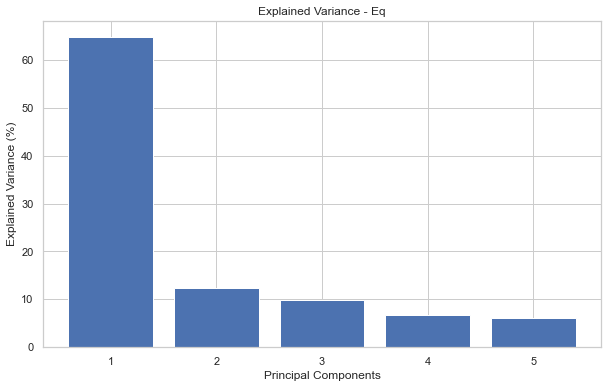

Selected 3 components for Eq (cumulative explained variance: 0.87)
Eq_PC1 is stationary (p-value=0.0000).
Eq_PC2 is stationary (p-value=0.0000).
Eq_PC3 is stationary (p-value=0.0000).
Processing Bond


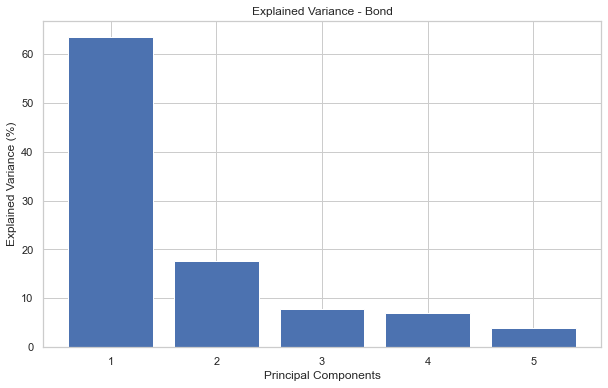

Selected 2 components for Bond (cumulative explained variance: 0.81)
Bond_PC1 is stationary (p-value=0.0000).
Bond_PC2 is stationary (p-value=0.0000).
Processing IR


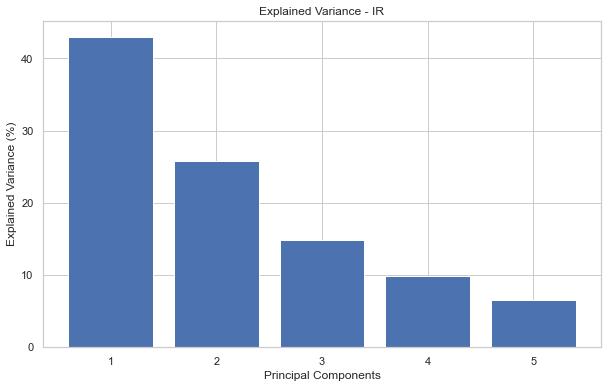

Selected 3 components for IR (cumulative explained variance: 0.84)
IR_PC1 is stationary (p-value=0.0000).
IR_PC2 is stationary (p-value=0.0000).
IR_PC3 is stationary (p-value=0.0000).


In [77]:
from statsmodels.tsa.stattools import adfuller

# --- Create stationary version of each group ---

def log_diff(series):
    return np.diff(np.log(series))

def first_diff(series):
    return np.diff(series)

def identity(series):
    return series[1:]  # just to align lengths

# Empty dictionaries to hold stationary data
stationary_data = {}

# Apply transformations
groups = {
    'commodities': commodities,
    'currencies': currencies,
    'bond_indices': bond_indices,
    'equity_indices': equity_indices,
    'volatility_index': volatility_index,
    'interest_rates': interest_rates,
    'economic_surprise': economic_surprise
}

for group_name, variables in groups.items():
    transformed = pd.DataFrame(index=X_df.index[1:])  # After diff/logdiff we lose one row
    for var in variables:
        if var in X_df.columns:
            if group_name == 'interest_rates':
                transformed[var] = first_diff(X_df[var])
            elif group_name == 'economic_surprise':
                transformed[var] = identity(X_df[var])
            else:
                transformed[var] = log_diff(X_df[var])
    stationary_data[group_name] = transformed

# Now we have stationary versions:
# stationary_data['commodities'], stationary_data['currencies'], etc.

# --- Apply Kernel PCA to specific groups (equity, bond, interest rate) ---

def apply_kpca_and_check_stationarity(df_group, group_label, kernel='rbf', gamma=0.1):
    print(f"Processing {group_label}")
    
    # Apply Kernel PCA
    kpca = KernelPCA(n_components=min(5, df_group.shape[1]), kernel=kernel, gamma=gamma, fit_inverse_transform=False)
    components = kpca.fit_transform(df_group)
    
    # Explained variance via eigenvalues (approximation since KPCA doesn't return explained variance directly)
    eigenvalues = np.var(components, axis=0)
    explained_var_ratio = eigenvalues / np.sum(eigenvalues)
    
    # Plot explained variance
    plt.figure()
    plt.bar(range(1, len(explained_var_ratio)+1), explained_var_ratio*100)
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance (%)')
    plt.title(f'Explained Variance - {group_label}')
    plt.show()

    # Select number of components such that explained variance >80% or max 3 components
    cum_var = np.cumsum(explained_var_ratio)
    n_components_selected = min(3, np.searchsorted(cum_var, 0.8) + 1)

    print(f"Selected {n_components_selected} components for {group_label} (cumulative explained variance: {cum_var[n_components_selected-1]:.2f})")
    
    selected_components = components[:, :n_components_selected]

    # Build a DataFrame with proper names
    component_names = [f"{group_label}_PC{i+1}" for i in range(n_components_selected)]
    kpca_df = pd.DataFrame(selected_components, index=df_group.index, columns=component_names)

    # Check stationarity and difference if necessary
    final_df = pd.DataFrame(index=kpca_df.index)  # Lose one more row if differencing
    for col in kpca_df.columns:
        adf_test = adfuller(kpca_df[col])
        p_value = adf_test[1]
        if p_value > 0.05:
            print(f"{col} is non-stationary (p-value={p_value:.4f}), applying first difference.")
            final_df[col] = np.diff(kpca_df[col])
        else:
            print(f"{col} is stationary (p-value={p_value:.4f}).")
            final_df[col] = kpca_df[col]  # align index
        
    return final_df

# Apply the function
Eq_kpca = apply_kpca_and_check_stationarity(stationary_data['equity_indices'], 'Eq')
Bond_kpca = apply_kpca_and_check_stationarity(stationary_data['bond_indices'], 'Bond')
IR_kpca = apply_kpca_and_check_stationarity(stationary_data['interest_rates'], 'IR')

# Now Eq_kpca, Bond_kpca and IR_kpca are ready and stationary 🎯

## MVG-based anomaly detector with supervised threshold tuning

We now apply our **Multivariate Gaussian anomaly detector**  to our stationary and condensed dataset.

We follow the same steps as with synthetic data for each group, we'll have 7 different models and exploit majority voting for final predictions:

1. Fit the distribution of normal data.
2. Score all points using the estimated PDF.
3. Tune the threshold $\varepsilon$ on a labeled validation set.
4. Evaluate on a held-out test set.

<br>

Let's start with **reshuffling and splitting** our data.

<br>

In [78]:
# Adjust the response variable to match the new data length
if y is not None:
    y_stationary = y[1:]
else:
    y_stationary = None

# Check shapes of each group to verify time series lengths
print("Checking shapes of each data group:")
print("-" * 50)

# Original data
print(f"Original X_df shape: {X_df.shape}")
print()

# Check shapes of original grouped data
print("Original grouped data:")
for group_name, variables in groups.items():
    # Count only columns that exist in X_df
    valid_vars = [var for var in variables if var in X_df.columns]
    print(f"  {group_name}: {len(valid_vars)} variables")
print()

# Check shapes of stationary data
print("Stationary transformed data:")
for group_name, df in stationary_data.items():
    print(f"  {group_name}: {df.shape} (rows, columns)")
print()

# Check shape of response variable results
print(f"Response variable Y shape: {y_stationary.shape} (rows, columns)")
print()

# Check shapes of PCA results
print("KPCA transformed data:")
print(f"  Equity indices (Eq_kpca): {Eq_kpca.shape} (rows, columns)")
print(f"  Bond indices (Bond_kpca): {Bond_kpca.shape} (rows, columns)")
print(f"  Interest rates (IR_kpca): {IR_kpca.shape} (rows, columns)")
print()

# Check for row alignment by comparing indices
print("Checking index alignment:")
stationary_keys = list(stationary_data.keys())
if len(stationary_keys) > 1:
    first_index = stationary_data[stationary_keys[0]].index
    for group_name in stationary_keys[1:]:
        current_index = stationary_data[group_name].index
        is_aligned = first_index.equals(current_index)
        print(f"  {stationary_keys[0]} and {group_name} indices aligned: {is_aligned}")

# Check if PCA results have aligned indices
if hasattr(Eq_kpca, 'index') and hasattr(Bond_kpca, 'index') and hasattr(IR_kpca, 'index'):
    print("  Eq_kpca and Bond_kpca indices aligned:", Eq_kpca.index.equals(Bond_kpca.index))
    print("  Eq_kpca and IR_kpca indices aligned:", Eq_kpca.index.equals(IR_kpca.index))
    print("  Bond_kpca and IR_kpca indices aligned:", Bond_kpca.index.equals(IR_kpca.index))

Checking shapes of each data group:
--------------------------------------------------
Original X_df shape: (1111, 42)

Original grouped data:
  commodities: 4 variables
  currencies: 3 variables
  bond_indices: 8 variables
  equity_indices: 7 variables
  volatility_index: 1 variables
  interest_rates: 18 variables
  economic_surprise: 1 variables

Stationary transformed data:
  commodities: (1110, 4) (rows, columns)
  currencies: (1110, 3) (rows, columns)
  bond_indices: (1110, 8) (rows, columns)
  equity_indices: (1110, 7) (rows, columns)
  volatility_index: (1110, 1) (rows, columns)
  interest_rates: (1110, 18) (rows, columns)
  economic_surprise: (1110, 1) (rows, columns)

Response variable Y shape: (1110,) (rows, columns)

KPCA transformed data:
  Equity indices (Eq_kpca): (1110, 3) (rows, columns)
  Bond indices (Bond_kpca): (1110, 2) (rows, columns)
  Interest rates (IR_kpca): (1110, 3) (rows, columns)

Checking index alignment:
  commodities and currencies indices aligned: True

Starting Multivariate Gaussian Anomaly Detection with Majority Voting

Response variable Y shape: (1110,)

Processing group: commodities
Total examples: 1110
Normal examples: 873
Anomalous examples: 237
Training set size: 698 (all normal)
Cross-validation set size: 205 (87 normal, 118 anomalies)
Test set size: 207 (88 normal, 119 anomalies)

--- Processing commodities Group ---
Mean vector shape: (4,)
Covariance matrix shape: (4, 4)
Best Accuracy on CV set: 0.6537
Best Epsilon: 1.61503563e-02
Corresponding F1 score: 0.7102
Corresponding Precision: 0.6850
Corresponding Recall: 0.7373


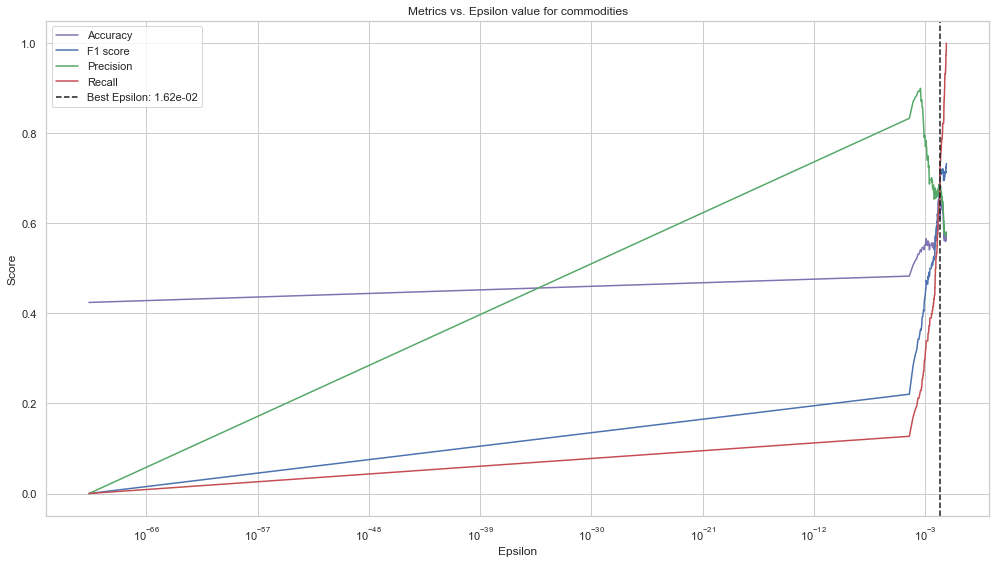


Test set performance for commodities:
Accuracy: 0.5507
Precision: 0.5942
Recall: 0.6891
F1 Score: 0.6381

Confusion Matrix:
True Negatives: 32
False Positives: 56
False Negatives: 37
True Positives: 82


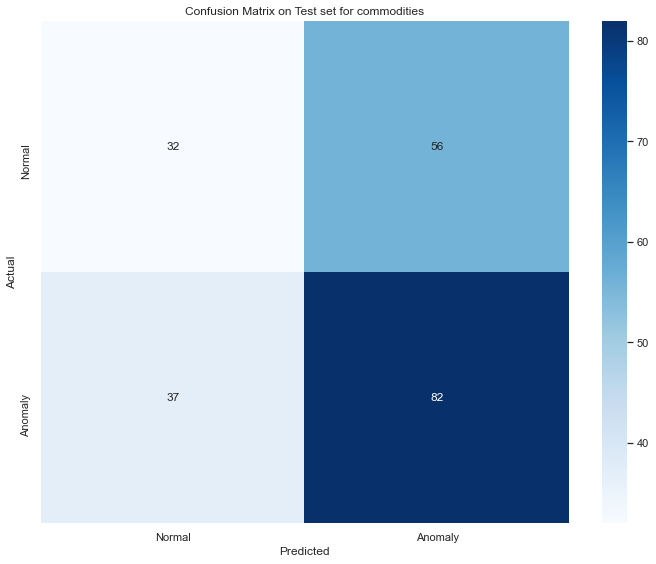


Processing group: currencies
Total examples: 1110
Normal examples: 873
Anomalous examples: 237
Training set size: 698 (all normal)
Cross-validation set size: 205 (87 normal, 118 anomalies)
Test set size: 207 (88 normal, 119 anomalies)

--- Processing currencies Group ---
Mean vector shape: (3,)
Covariance matrix shape: (3, 3)
Best Accuracy on CV set: 0.5902
Best Epsilon: 4.29360567e-02
Corresponding F1 score: 0.6471
Corresponding Precision: 0.6417
Corresponding Recall: 0.6525


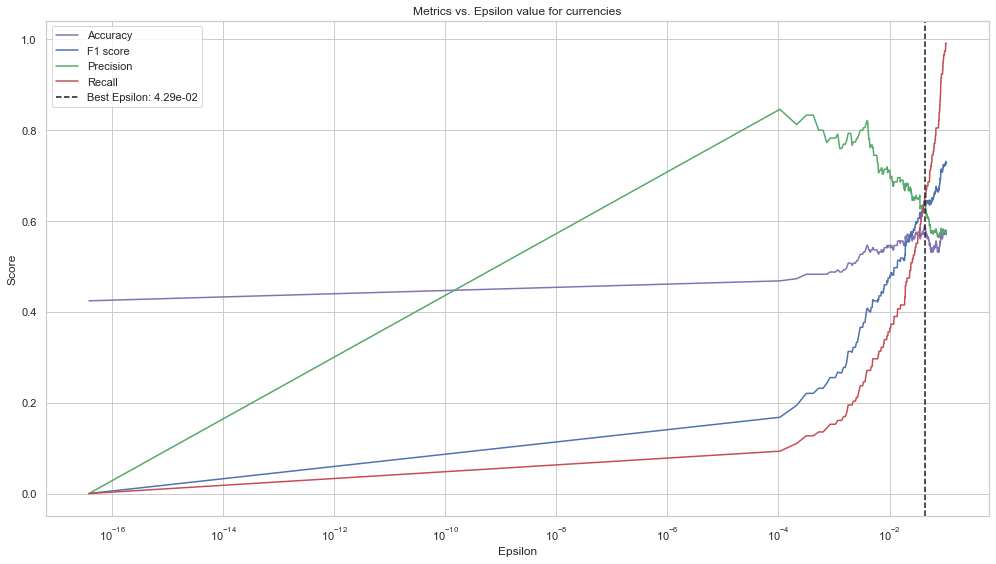


Test set performance for currencies:
Accuracy: 0.6329
Precision: 0.6693
Recall: 0.7143
F1 Score: 0.6911

Confusion Matrix:
True Negatives: 46
False Positives: 42
False Negatives: 34
True Positives: 85


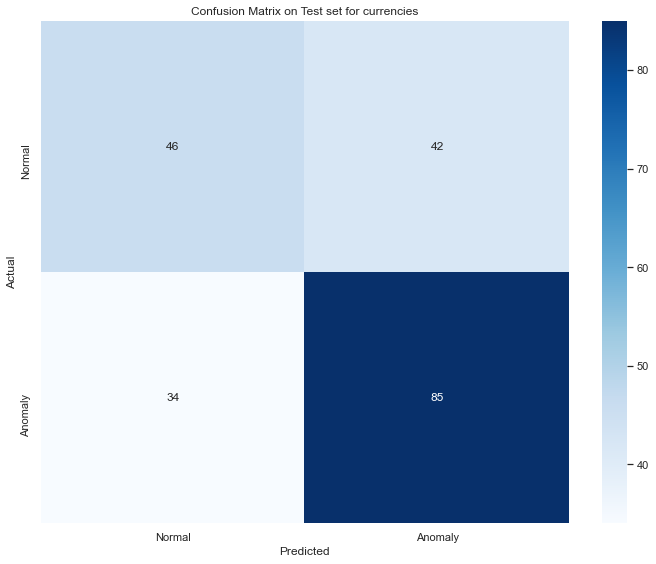


Processing group: equity_indices
Total examples: 1110
Normal examples: 873
Anomalous examples: 237
Training set size: 698 (all normal)
Cross-validation set size: 205 (87 normal, 118 anomalies)
Test set size: 207 (88 normal, 119 anomalies)

--- Processing equity_indices Group ---
Mean vector shape: (3,)
Covariance matrix shape: (3, 3)
Best Accuracy on CV set: 0.6634
Best Epsilon: 1.84546758e-02
Corresponding F1 score: 0.6933
Corresponding Precision: 0.7290
Corresponding Recall: 0.6610


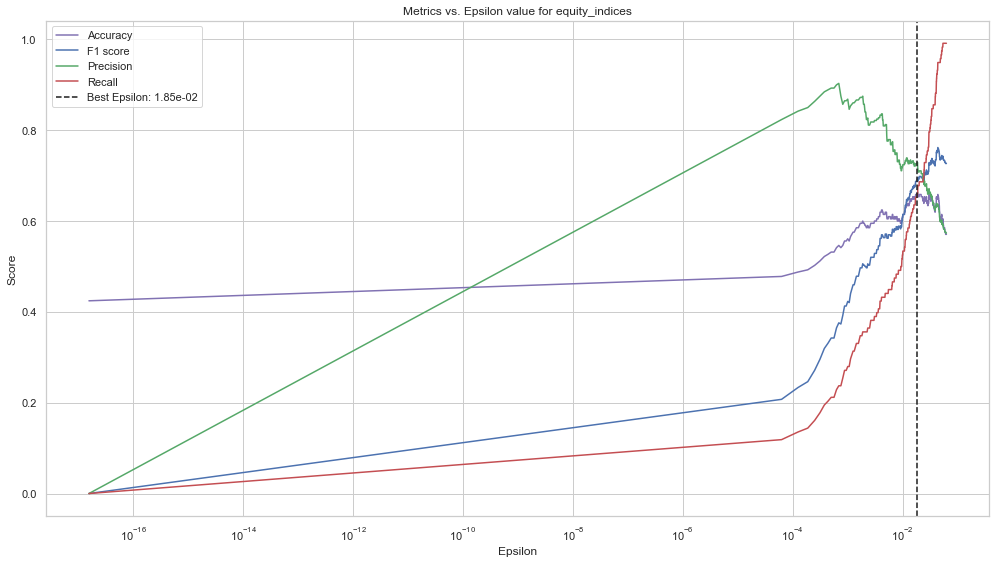


Test set performance for equity_indices:
Accuracy: 0.5942
Precision: 0.6446
Recall: 0.6555
F1 Score: 0.6500

Confusion Matrix:
True Negatives: 45
False Positives: 43
False Negatives: 41
True Positives: 78


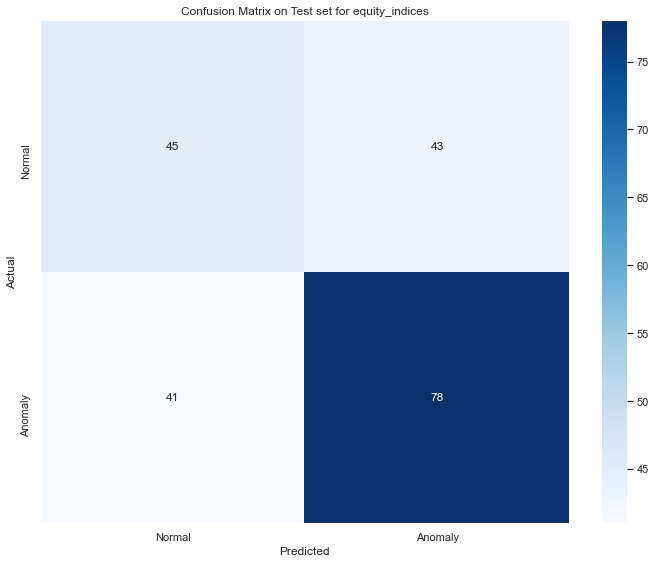


Processing group: bond_indices
Total examples: 1110
Normal examples: 873
Anomalous examples: 237
Training set size: 698 (all normal)
Cross-validation set size: 205 (87 normal, 118 anomalies)
Test set size: 207 (88 normal, 119 anomalies)

--- Processing bond_indices Group ---
Mean vector shape: (2,)
Covariance matrix shape: (2, 2)
Best Accuracy on CV set: 0.6341
Best Epsilon: 1.08733756e-01
Corresponding F1 score: 0.6862
Corresponding Precision: 0.6777
Corresponding Recall: 0.6949


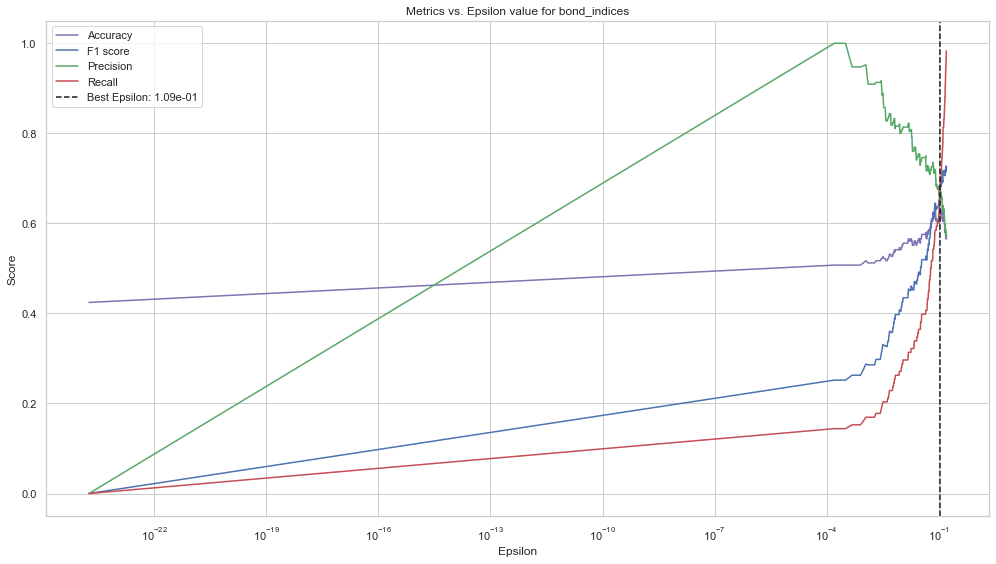


Test set performance for bond_indices:
Accuracy: 0.5942
Precision: 0.6400
Recall: 0.6723
F1 Score: 0.6557

Confusion Matrix:
True Negatives: 43
False Positives: 45
False Negatives: 39
True Positives: 80


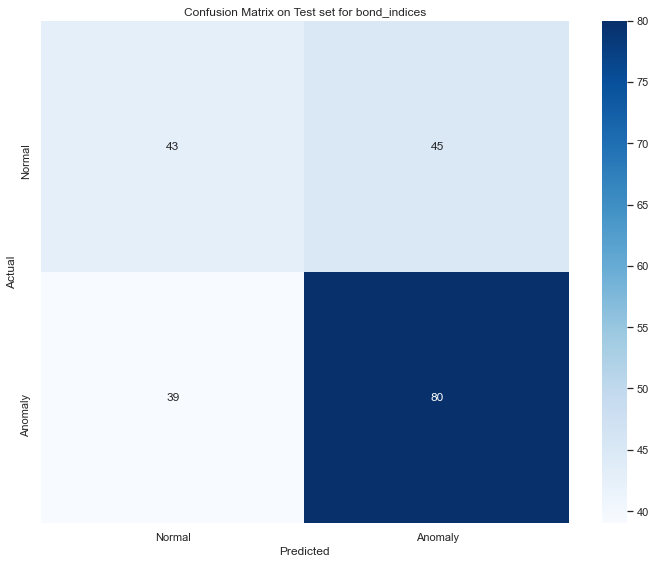


Processing group: volatility_index
Total examples: 1110
Normal examples: 873
Anomalous examples: 237
Training set size: 698 (all normal)
Cross-validation set size: 205 (87 normal, 118 anomalies)
Test set size: 207 (88 normal, 119 anomalies)

--- Processing volatility_index Group ---
Mean value: [-2.54492384e-18]
Variance value: [1.]
Best Accuracy on CV set: 0.6000
Best Epsilon: 3.96547251e-01
Corresponding F1 score: 0.7338
Corresponding Precision: 0.5947
Corresponding Recall: 0.9576


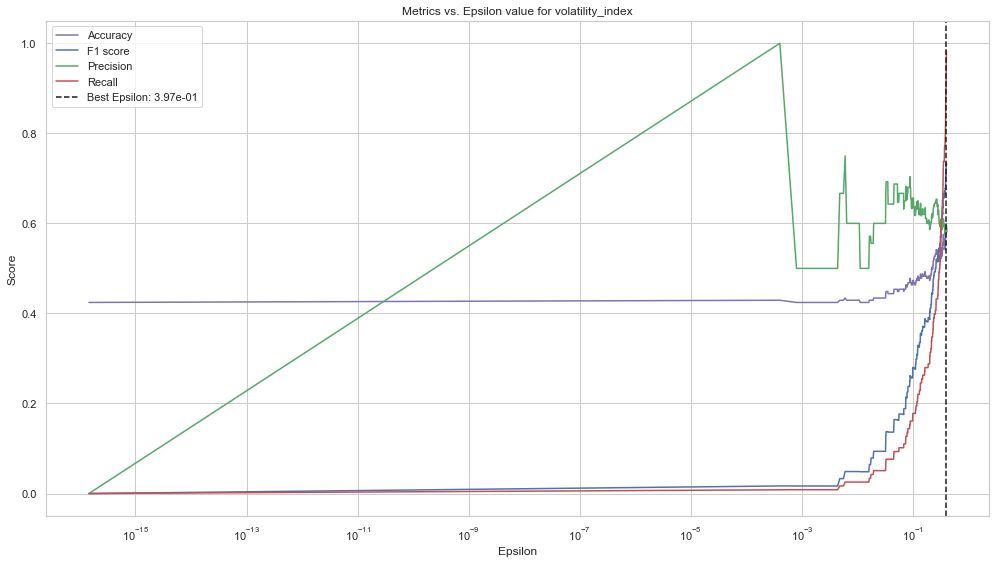


Test set performance for volatility_index:
Accuracy: 0.5700
Precision: 0.5781
Recall: 0.9328
F1 Score: 0.7138

Confusion Matrix:
True Negatives: 7
False Positives: 81
False Negatives: 8
True Positives: 111


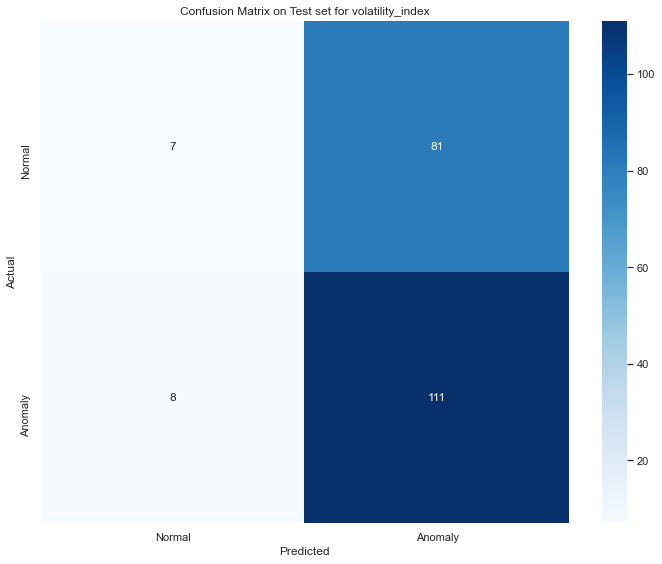


Processing group: interest_rates
Total examples: 1110
Normal examples: 873
Anomalous examples: 237
Training set size: 698 (all normal)
Cross-validation set size: 205 (87 normal, 118 anomalies)
Test set size: 207 (88 normal, 119 anomalies)

--- Processing interest_rates Group ---
Mean vector shape: (3,)
Covariance matrix shape: (3, 3)
Best Accuracy on CV set: 0.5951
Best Epsilon: 3.35370162e-02
Corresponding F1 score: 0.6498
Corresponding Precision: 0.6471
Corresponding Recall: 0.6525


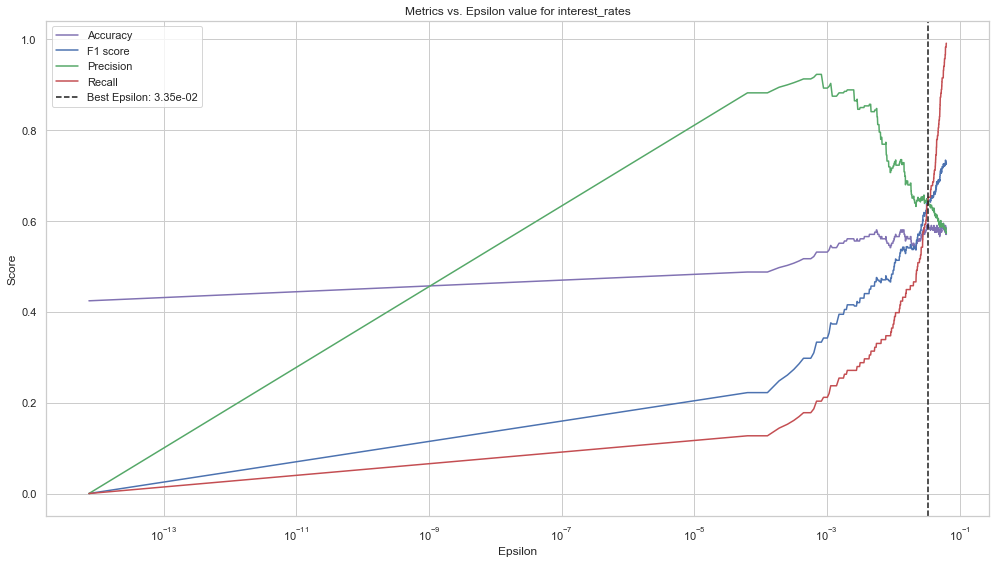


Test set performance for interest_rates:
Accuracy: 0.5990
Precision: 0.6364
Recall: 0.7059
F1 Score: 0.6693

Confusion Matrix:
True Negatives: 40
False Positives: 48
False Negatives: 35
True Positives: 84


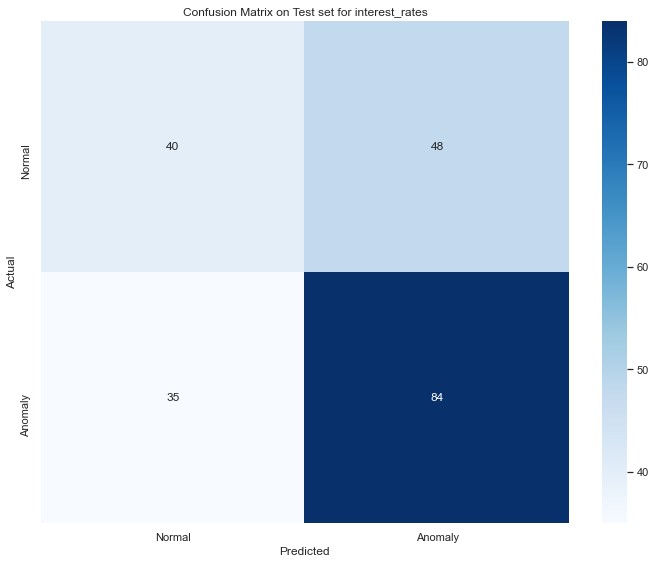


Processing group: economic_surprise
Total examples: 1110
Normal examples: 873
Anomalous examples: 237
Training set size: 698 (all normal)
Cross-validation set size: 205 (87 normal, 118 anomalies)
Test set size: 207 (88 normal, 119 anomalies)

--- Processing economic_surprise Group ---
Mean value: [-2.03593907e-17]
Variance value: [1.]
Best Accuracy on CV set: 0.5707
Best Epsilon: 3.98548091e-01
Corresponding F1 score: 0.7215
Corresponding Precision: 0.5758
Corresponding Recall: 0.9661


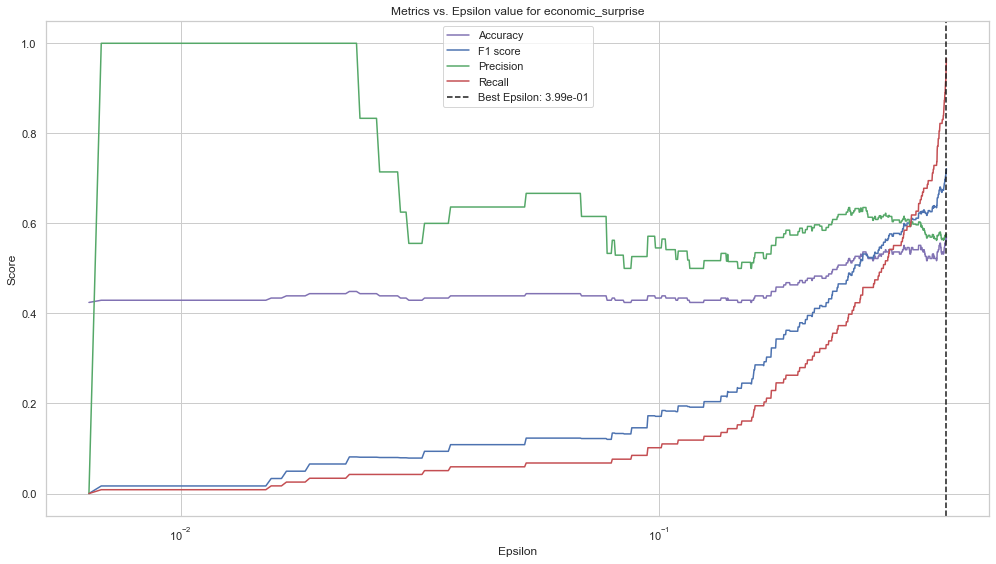


Test set performance for economic_surprise:
Accuracy: 0.5845
Precision: 0.5813
Recall: 0.9916
F1 Score: 0.7329

Confusion Matrix:
True Negatives: 3
False Positives: 85
False Negatives: 1
True Positives: 118


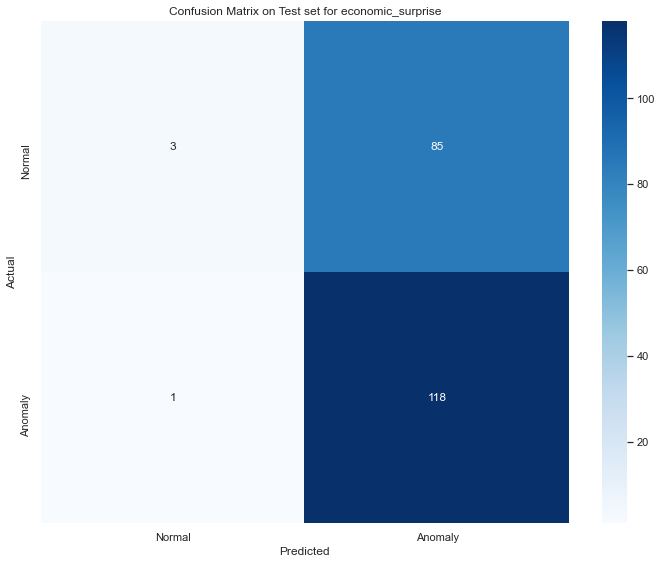



APPLYING MAJORITY VOTING FOR FINAL PREDICTIONS

Majority Voting Results:
Accuracy: 0.5990
Precision: 0.6059
Recall: 0.8655
F1 Score: 0.7128

Confusion Matrix for Majority Voting:
True Negatives: 21
False Positives: 67
False Negatives: 16
True Positives: 103


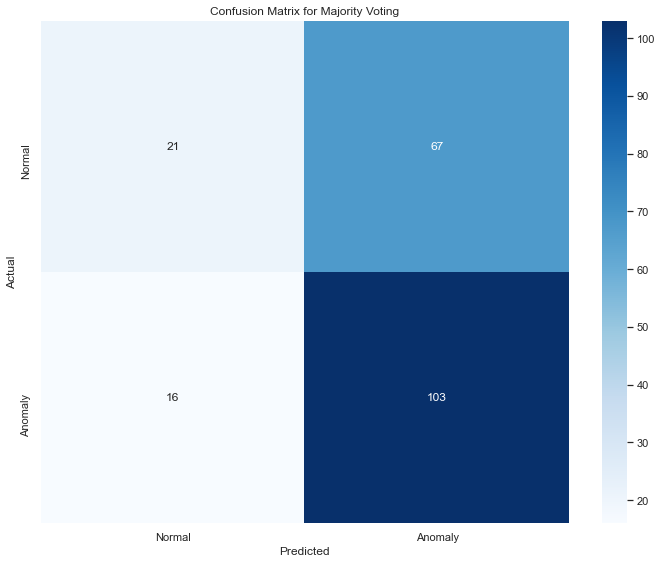



SUMMARY OF RESULTS

Performance metrics for all models:
                   Accuracy  Precision    Recall  F1 Score
commodities        0.550725   0.594203  0.689076  0.638132
currencies         0.632850   0.669291  0.714286  0.691057
equity_indices     0.594203   0.644628  0.655462  0.650000
bond_indices       0.594203   0.640000  0.672269  0.655738
volatility_index   0.570048   0.578125  0.932773  0.713826
interest_rates     0.599034   0.636364  0.705882  0.669323
economic_surprise  0.584541   0.581281  0.991597  0.732919
Majority Voting    0.599034   0.605882  0.865546  0.712803


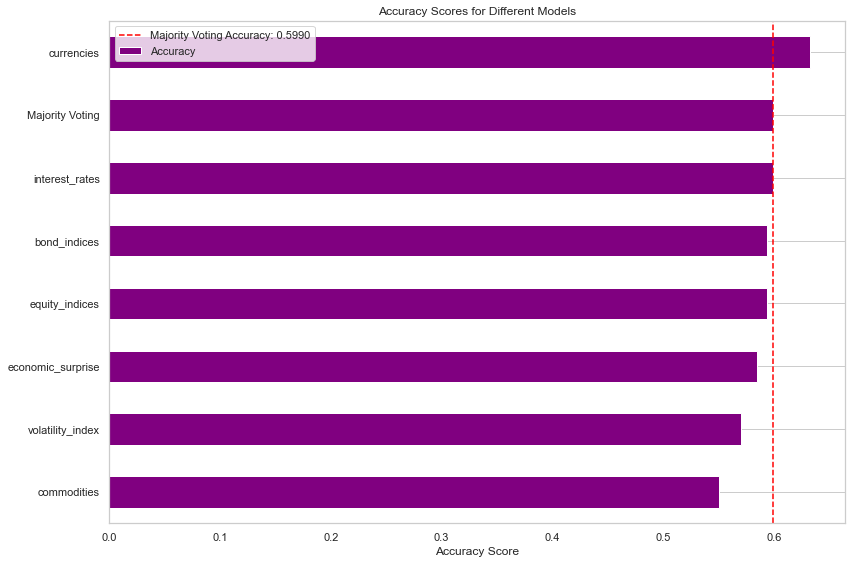

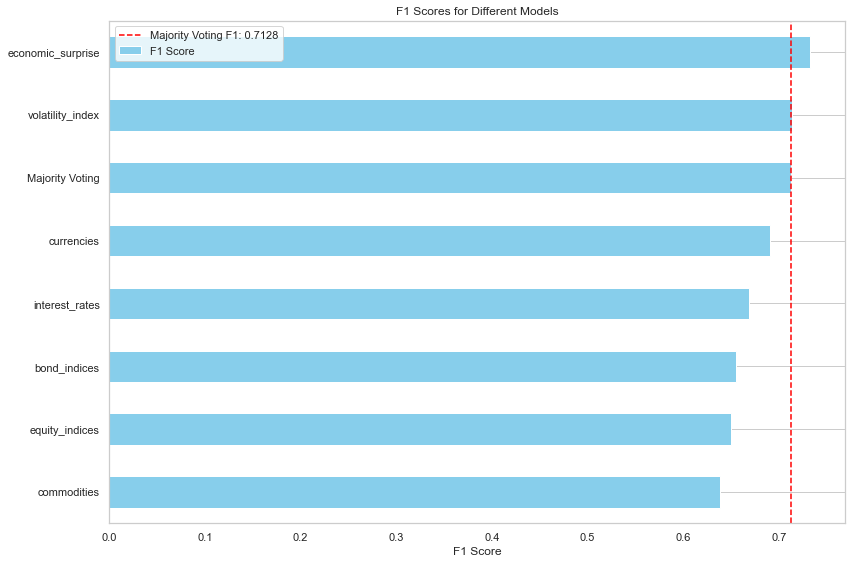

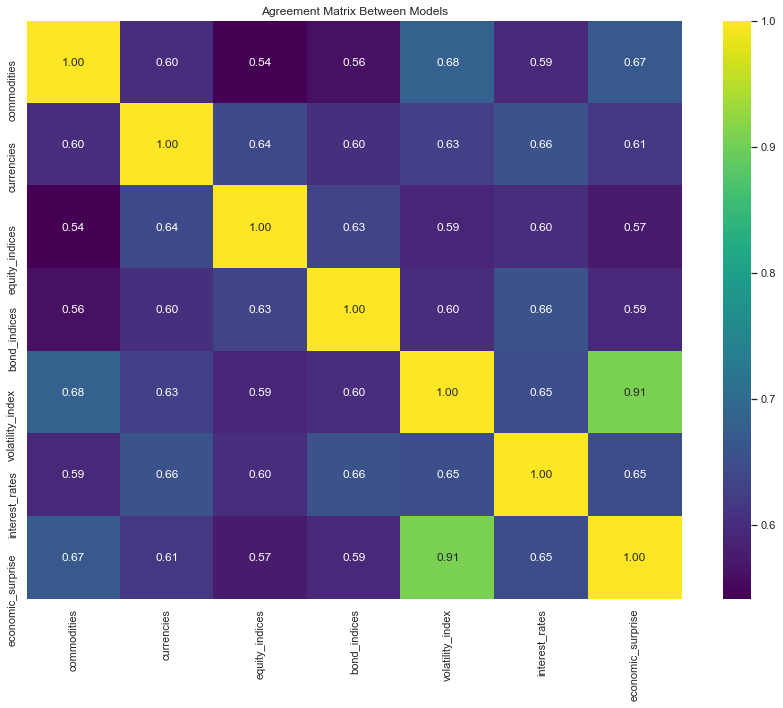

In [86]:
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

# Set visualization style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [12, 8]

# Function to calculate Gaussian PDF (handles both univariate and multivariate cases)
def multivariate_gaussian_pdf(X, mu, sigma):
    """Calculate the Gaussian probability density function (univariate or multivariate)"""
    n = mu.shape[0]
    
    # Univariate distribution (only one feature)
    if n == 1:
        # Univariate gaussian PDF 
        variance = sigma[0]  # variance
        p = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            x_minus_mu = X[i, 0] - mu[0]
            p[i] = (1.0 / np.sqrt(2 * np.pi * variance)) * \
                   np.exp(-0.5 * (x_minus_mu**2) / variance)
        return p
    
    # standard: multivariate distribution (2+ features)
    # Handle potential numerical issues with the covariance matrix
    # Add a small regularization term to ensure positive definiteness
    else :
        sigma_reg = sigma + np.eye(n) * 1e-8

        # Calculate determinant and inverse
        try:
            det = np.linalg.det(sigma_reg)
            inv = np.linalg.inv(sigma_reg)
        except np.linalg.LinAlgError:
            # If still having issues, use pseudo-inverse
            print("Warning: Using pseudo-inverse for covariance matrix")
            det = max(np.linalg.det(sigma_reg), 1e-10)
            inv = np.linalg.pinv(sigma_reg)

        # Calculate PDF for each example
        p = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            x_mu = X[i] - mu
            p[i] = (1.0 / (np.power(2 * np.pi, n/2) * np.sqrt(det))) * \
                np.exp(-0.5 * x_mu.dot(inv).dot(x_mu))

    return p

# Function to train and evaluate multivariate Gaussian model
def train_evaluate_mvg(X_train, X_cv, y_cv, X_test, y_test, group_name):
    """Train and evaluate multivariate Gaussian model for a specific group"""
    
    print(f"\n--- Processing {group_name} Group ---")
    
    # Step 2: Training the model (estimating parameters of multivariate Gaussian)
    # Calculate mean vector
    mu = np.mean(X_train, axis=0)
    
    # Calculate covariance matrix - handle both univariate and multivariate cases
    if X_train.shape[1] == 1:
        # For univariate case, just calculate variance
        sigma = np.var(X_train, axis=0)
        print(f"Mean value: {mu}")
        print(f"Variance value: {sigma}")
    else:
        # For multivariate case, calculate full covariance matrix
        sigma = np.cov(X_train, rowvar=False)
        print(f"Mean vector shape: {mu.shape}")
        print(f"Covariance matrix shape: {sigma.shape}")
    
    # Step 3: Fine tuning the hyperparameter, the threshold ϵ
    # Compute the probability density function for the cross-validation set
    p_cv = multivariate_gaussian_pdf(X_cv, mu, sigma)
    
    # Find the range of epsilon values to search
    min_epsilon = np.min(p_cv)
    max_epsilon = np.max(p_cv)
    step_size = (max_epsilon - min_epsilon) / 1000
    
    # Find the best epsilon using Accuracy score
    best_epsilon = 0
    best_accuracy = 0
    best_precision = 0
    best_recall = 0
    best_f1 = 0
    
    epsilon_values = np.arange(min_epsilon, max_epsilon, step_size)
    accuracy_scores = []
    f1_scores = []
    precisions = []
    recalls = []
    
    for epsilon in epsilon_values:
        predictions = (p_cv < epsilon).astype(int)
        
        # Calculate metrics
        accuracy = accuracy_score(y_cv, predictions)
        precision = precision_score(y_cv, predictions, zero_division=0)
        recall = recall_score(y_cv, predictions, zero_division=0)
        
        # Calculate F1 score
        if precision + recall > 0:  # Avoid division by zero
            f1 = 2 * precision * recall / (precision + recall)
        else:
            f1 = 0
        
        accuracy_scores.append(accuracy)
        f1_scores.append(f1)
        precisions.append(precision)
        recalls.append(recall)
        
        # Now we optimize for accuracy instead of F1
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_epsilon = epsilon
            best_precision = precision
            best_recall = recall
            best_f1 = f1
    
    print(f"Best Accuracy on CV set: {best_accuracy:.4f}")
    print(f"Best Epsilon: {best_epsilon:.8e}")
    print(f"Corresponding F1 score: {best_f1:.4f}")
    print(f"Corresponding Precision: {best_precision:.4f}")
    print(f"Corresponding Recall: {best_recall:.4f}")
    
    # Plot Accuracy, F1 score, precision, and recall vs epsilon
    plt.figure(figsize=(14, 8))
    plt.plot(epsilon_values, accuracy_scores, 'm-', label='Accuracy')
    plt.plot(epsilon_values, f1_scores, 'b-', label='F1 score')
    plt.plot(epsilon_values, precisions, 'g-', label='Precision')
    plt.plot(epsilon_values, recalls, 'r-', label='Recall')
    plt.axvline(x=best_epsilon, color='k', linestyle='--', label=f'Best Epsilon: {best_epsilon:.2e}')
    plt.xlabel('Epsilon')
    plt.ylabel('Score')
    plt.title(f'Metrics vs. Epsilon value for {group_name}')
    plt.legend()
    plt.xscale('log')  # Log scale for better visualization
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Step 4: Testing the model
    # Compute the probability density function for the test set
    p_test = multivariate_gaussian_pdf(X_test, mu, sigma)
    
    # Make predictions using the best epsilon
    predictions = (p_test < best_epsilon).astype(int)
    
    # Calculate metrics
    test_accuracy = accuracy_score(y_test, predictions)
    test_precision = precision_score(y_test, predictions, zero_division=0)
    test_recall = recall_score(y_test, predictions, zero_division=0)
    test_f1 = f1_score(y_test, predictions, zero_division=0)
    
    print(f"\nTest set performance for {group_name}:")
    print(f"Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {test_precision:.4f}")
    print(f"Recall: {test_recall:.4f}")
    print(f"F1 Score: {test_f1:.4f}")
    
    # Create confusion matrix
    cm = confusion_matrix(y_test, predictions)
    tn, fp, fn, tp = cm.ravel()
    
    print("\nConfusion Matrix:")
    print(f"True Negatives: {tn}")
    print(f"False Positives: {fp}")
    print(f"False Negatives: {fn}")
    print(f"True Positives: {tp}")
    
    # Visualize confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Normal', 'Anomaly'],
                yticklabels=['Normal', 'Anomaly'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix on Test set for {group_name}')
    plt.tight_layout()
    plt.show()
    
    return predictions, test_accuracy, test_precision, test_recall, test_f1

# Main execution 
print("Starting Multivariate Gaussian Anomaly Detection with Majority Voting\n")

# Check if y_stationary is provided
if y_stationary is None:
    raise ValueError("Response variable y_stationary is not defined")

print(f"Response variable Y shape: {y_stationary.shape}")

# Prepare data for each group, using PCA versions for equity, bond and interest rates
groups_data = {
    'commodities': stationary_data['commodities'],
    'currencies': stationary_data['currencies'],
    'equity_indices': Eq_kpca,  # Using PCA version instead of original
    'bond_indices': Bond_kpca,  # Using PCA version instead of original
    'volatility_index': stationary_data['volatility_index'],
    'interest_rates': IR_kpca,  # Using PCA version instead of original
    'economic_surprise': stationary_data['economic_surprise']
}

# Store results for all groups
all_results = {}
all_test_predictions = {}

# Process each group
for group_name, df in groups_data.items():
    print(f"\n{'='*50}\nProcessing group: {group_name}\n{'='*50}")
    
    # Convert to numpy arrays for easier manipulation
    X = df.values
    y = y_stationary
    
    # Check if X and y have compatible shapes
    if len(X) != len(y):
        print(f"Warning: X shape {X.shape} and y shape {y.shape} are incompatible for {group_name}")
        print("Skipping this group")
        continue
    
    # Step 1: Creating training/cross-validation/test set with reshuffling
    # Reshuffle the data (this will break down autocorrelation)
    X_shuffled, y_shuffled = shuffle(X, y, random_state=42)
    
    # Separate normal and anomalous examples
    X_normal = X_shuffled[y_shuffled == 0]
    X_anomaly = X_shuffled[y_shuffled == 1]
    
    # Calculate sizes for each set
    n_normal = X_normal.shape[0]
    n_anomaly = X_anomaly.shape[0]
    
    print(f"Total examples: {len(X)}")
    print(f"Normal examples: {n_normal}")
    print(f"Anomalous examples: {n_anomaly}")
    
    # Training set: 80% of normal examples
    train_size = int(0.8 * n_normal)
    X_train = X_normal[:train_size]
    
    # Cross-validation set: 10% of normal examples and 50% of anomalies
    cv_normal_size = int(0.1 * n_normal)
    cv_anomaly_size = int(0.5 * n_anomaly)
    X_cv_normal = X_normal[train_size:train_size + cv_normal_size]
    X_cv_anomaly = X_anomaly[:cv_anomaly_size]
    X_cross_val = np.vstack((X_cv_normal, X_cv_anomaly))
    y_cross_val = np.hstack((np.zeros(cv_normal_size), np.ones(cv_anomaly_size)))
    
    # Test set: 10% of normal examples and 50% of anomalies
    X_test_normal = X_normal[train_size + cv_normal_size:]
    X_test_anomaly = X_anomaly[cv_anomaly_size:]
    X_test = np.vstack((X_test_normal, X_test_anomaly))
    y_test = np.hstack((np.zeros(len(X_test_normal)), np.ones(len(X_test_anomaly))))
    
    # We'll standardize the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_cross_val = scaler.transform(X_cross_val)
    X_test = scaler.transform(X_test)
    
    print(f"Training set size: {X_train.shape[0]} (all normal)")
    print(f"Cross-validation set size: {X_cross_val.shape[0]} ({cv_normal_size} normal, {cv_anomaly_size} anomalies)")
    print(f"Test set size: {X_test.shape[0]} ({len(X_test_normal)} normal, {len(X_test_anomaly)} anomalies)")
    
    # Train and evaluate the model
    predictions, accuracy, precision, recall, f1 = train_evaluate_mvg(
        X_train, X_cross_val, y_cross_val, X_test, y_test, group_name
    )
    
    # Store the results
    all_results[group_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }
    
    all_test_predictions[group_name] = {
        'predictions': predictions,
        'y_test': y_test
    }

# Step 5: Apply majority voting on the test set predictions
print("\n\n" + "="*60)
print("APPLYING MAJORITY VOTING FOR FINAL PREDICTIONS")
print("="*60)

# Extract all test predictions and actual labels
# We need to ensure all test sets have the same examples in the same order
# For simplicity, we'll check if all y_test are identical
y_test_values = [data['y_test'] for data in all_test_predictions.values()]
all_same = all((y_test_values[0] == y_test).all() for y_test in y_test_values[1:])

if not all_same:
    print("Warning: Test sets are not identical across all groups!")
    # In a real scenario, you would need to handle this case carefully
    # For this example, we'll proceed with the assumption they're aligned

# Get a reference y_test from any group
reference_y_test = next(iter(all_test_predictions.values()))['y_test']

# Create a matrix of all predictions
all_preds = np.array([data['predictions'] for data in all_test_predictions.values()])

# Apply majority voting (more than half of the models predict anomaly)
majority_threshold = all_preds.shape[0] / 2
majority_votes = (np.sum(all_preds, axis=0) > majority_threshold).astype(int)

# Calculate metrics for the majority voting
majority_accuracy = accuracy_score(reference_y_test, majority_votes)
majority_precision = precision_score(reference_y_test, majority_votes, zero_division=0)
majority_recall = recall_score(reference_y_test, majority_votes, zero_division=0)
majority_f1 = f1_score(reference_y_test, majority_votes, zero_division=0)

print("\nMajority Voting Results:")
print(f"Accuracy: {majority_accuracy:.4f}")
print(f"Precision: {majority_precision:.4f}")
print(f"Recall: {majority_recall:.4f}")
print(f"F1 Score: {majority_f1:.4f}")

# Create confusion matrix for majority voting
cm_majority = confusion_matrix(reference_y_test, majority_votes)
tn, fp, fn, tp = cm_majority.ravel()

print("\nConfusion Matrix for Majority Voting:")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_majority, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Anomaly'],
            yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Majority Voting')
plt.tight_layout()
plt.show()

# Summary of results
print("\n\n" + "="*60)
print("SUMMARY OF RESULTS")
print("="*60)

# Create a DataFrame to display all results
results_df = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

for group_name, results in all_results.items():
    results_df.loc[group_name] = [
        results['accuracy'],
        results['precision'],
        results['recall'],
        results['f1']
    ]

# Add majority voting results
results_df.loc['Majority Voting'] = [majority_accuracy, majority_precision, majority_recall, majority_f1]

# Display and plot the results
print("\nPerformance metrics for all models:")
print(results_df)

# Plot Accuracy scores
plt.figure(figsize=(12, 8))
results_df['Accuracy'].sort_values().plot(kind='barh', color='purple')
plt.axvline(x=majority_accuracy, color='red', linestyle='--', 
            label=f'Majority Voting Accuracy: {majority_accuracy:.4f}')
plt.xlabel('Accuracy Score')
plt.title('Accuracy Scores for Different Models')
plt.legend()
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# Plot F1 scores for comparison
plt.figure(figsize=(12, 8))
results_df['F1 Score'].sort_values().plot(kind='barh', color='skyblue')
plt.axvline(x=majority_f1, color='red', linestyle='--', 
            label=f'Majority Voting F1: {majority_f1:.4f}')
plt.xlabel('F1 Score')
plt.title('F1 Scores for Different Models')
plt.legend()
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# Optional: Visualize agreement between models
agreement_matrix = np.zeros((len(all_test_predictions), len(all_test_predictions)))
group_names = list(all_test_predictions.keys())

for i, group1 in enumerate(group_names):
    for j, group2 in enumerate(group_names):
        preds1 = all_test_predictions[group1]['predictions']
        preds2 = all_test_predictions[group2]['predictions']
        agreement = np.mean(preds1 == preds2)
        agreement_matrix[i, j] = agreement

# Plot the agreement matrix
plt.figure(figsize=(12, 10))
sns.heatmap(agreement_matrix, annot=True, fmt='.2f', cmap='viridis',
            xticklabels=group_names, yticklabels=group_names)
plt.title('Agreement Matrix Between Models')
plt.tight_layout()
plt.show()

## MODEL 2: MVG-based anomaly detector with supervised threshold tuning

We apply again our **Multivariate Gaussian anomaly detector**  to our stationary and condensed dataset, but with few adjustments...

We follow the same steps as with synthetic data for each group. We'll have 7 different models, we combine them getting aggregate scores and optimize an aggregate $\varepsilon$  :

1. Fit the distribution of normal data for each subgroup.
2. Score all points using the estimated PDF.
3. Compute an aggregate score for each data point as the average of the log transformation of the subgroup densities. 
4. Tune the threshold $\varepsilon$ on a labeled validation set.
4. Evaluate on a held-out test set.

In [80]:
#Group the features
# Define lists of variables by type
# Commodities
commodities = [col for col in X_df.columns if col in ['XAUBGNL', 'CRY', 'Cl1','BDIY']]

# Currencies
currencies = [col for col in X_df.columns if col in ['DXY', 'GBP', 'JPY']]

# Bond Indices
bond_indices = [col for col in X_df.columns if col in ['EMUSTRUU', 'LF94TRUU', 'LF98TRUU', 'LG30TRUU', 'LMBITR', 'LP01TREU', 'LUACTRUU', 'LUMSTRUU']]

# Equity Indices
equity_indices = [col for col in X_df.columns if col in ['MXBR', 'MXCN', 'MXEU', 'MXIN', 'MXJP', 'MXRU', 'MXUS']]

# Volatility Index
volatility_index = [col for col in X_df.columns if col in ['VIX']]

# Interest Rates / Sovereign Yields
interest_rates = [col for col in X_df.columns if col in [
    'EONIA', 'GTDEM10Y', 'GTDEM2Y', 'GTDEM30Y', 'GTGBP20Y', 'GTGBP2Y', 'GTGBP30Y',
    'GTITL10YR', 'GTITL2YR', 'GTITL30YR', 'GTJPY10YR', 'GTJPY2YR', 'GTJPY30YR',
    'US0001M', 'USGG3M', 'USGG2YR', 'GT10', 'USGG30YR'
]]

# Economic Indicator
economic_surprise = [col for col in X_df.columns if col in ['ECSURPUS']]

Adjusting for stationarity and building 7 different dataframe...

In [81]:
from statsmodels.tsa.stattools import adfuller

# --- Create stationary version of each group ---

def log_diff(series):
    return np.diff(np.log(series))

def first_diff(series):
    return np.diff(series)

def identity(series):
    return series[1:]  # just to align lengths

# Empty dictionaries to hold stationary data
stationary_data = {}

# Apply transformations
groups = {
    'commodities': commodities,
    'currencies': currencies,
    'bond_indices': bond_indices,
    'equity_indices': equity_indices,
    'volatility_index': volatility_index,
    'interest_rates': interest_rates,
    'economic_surprise': economic_surprise
}

for group_name, variables in groups.items():          #groups.items() scorre le coppie(key,var) del dizionario
    transformed = pd.DataFrame(index=X_df.index[1:])  # After diff/logdiff we lose one row
    for var in variables:
        if var in X_df.columns:
            if group_name == 'interest_rates':
                transformed[var] = first_diff(X_df[var])
            elif group_name == 'economic_surprise':
                transformed[var] = identity(X_df[var])
            else:
                transformed[var] = log_diff(X_df[var])
    stationary_data[group_name] = transformed
 

# Now we have stationary versions:
# stationary_data['commodities'], stationary_data['currencies'], etc.

In [82]:
# stationary_data è un dizionario di DataFrame
#example...
stationary_data['commodities']

,BDIY,CRY,Cl1,XAUBGNL
Data,,,,
2000-01-18,0.012173,0.048106,0.112899,0.015415
2000-01-25,-0.026687,0.013424,-0.019955,-0.001740
2000-02-01,-0.042560,-0.002335,-0.002124,-0.015442
2000-02-08,-0.026277,-0.008547,-0.007112,0.053872
2000-02-15,0.086946,0.024777,0.070277,0.018264
...,...,...,...,...
2021-03-23,0.118609,-0.047253,-0.115009,-0.000706
2021-03-30,-0.076855,0.002014,0.047173,-0.024844
2021-04-06,-0.005244,0.005207,-0.020354,0.033671


Checking and adjusting dimensions...

In [88]:
# Check shapes of each group to verify time series lengths
print("Checking shapes of each data group:")
print("-" * 50)

# Original data
print(f"Original X_df shape: {X_df.shape}")
print()

# Check shapes of original grouped data
print("Original grouped data:")
for group_name, variables in groups.items():
    # Count only columns that exist in X_df
    valid_vars = [var for var in variables if var in X_df.columns]
    print(f"  {group_name}: {len(valid_vars)} variables")
print()

# Check shapes of stationary data
print("Stationary transformed data:")
for group_name, df in stationary_data.items():
    print(f"  {group_name}: {df.shape} (rows, columns)")
print()

# Check shape of response variable results
print(f"Response variable Y shape: {y_stationary.shape} (rows, columns)")
print()

Checking shapes of each data group:
--------------------------------------------------
Original X_df shape: (1111, 42)

Original grouped data:
  commodities: 4 variables
  currencies: 3 variables
  bond_indices: 8 variables
  equity_indices: 7 variables
  volatility_index: 1 variables
  interest_rates: 18 variables
  economic_surprise: 1 variables

Stationary transformed data:
  commodities: (1110, 4) (rows, columns)
  currencies: (1110, 3) (rows, columns)
  bond_indices: (1110, 8) (rows, columns)
  equity_indices: (1110, 7) (rows, columns)
  volatility_index: (1110, 1) (rows, columns)
  interest_rates: (1110, 18) (rows, columns)
  economic_surprise: (1110, 1) (rows, columns)

Response variable Y shape: (1110,) (rows, columns)



In [90]:
def multivariate_gaussian_pdf(X, mu, sigma):
    n = X.shape[1]  # numero di feature
    if n == 1:
        # caso univariato
        variance = sigma  # sigma è uno scalare
        p = (1. / np.sqrt(2 * np.pi * variance)) * \
            np.exp(-(X - mu)**2 / (2 * variance))
        return p.flatten()
    else:
        # caso multivariato
        k = mu.size
        det = np.linalg.det(sigma)
        inv = np.linalg.inv(sigma)
        norm_const = 1. / (np.power((2 * np.pi), k / 2) * np.sqrt(det))
        diff = X - mu
        exp_term = np.einsum('ij,jk,ik->i', diff, inv, diff)
        return norm_const * np.exp(-0.5 * exp_term)

In [91]:
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

P_cv_groups = {}
P_test_groups = {}
scalers = {}

for group_name, df in stationary_data.items():
    print(f"Processing group: {group_name}")
    
    X = df.values
    y = y_stationary

    # Shuffle dataset
    X_shuffled, y_shuffled = shuffle(X, y, random_state=42)

    # separation anamalies from normal data
    X_normal = X_shuffled[y_shuffled == 0]
    X_anomaly = X_shuffled[y_shuffled == 1]

    # dimensions of the splits of Train/Cross-val/Test
    n_normal = X_normal.shape[0]
    n_anomaly = X_anomaly.shape[0]

    train_size = int(0.8 * n_normal)
    cv_normal_size = int(0.1 * n_normal)
    test_normal_size = n_normal - train_size - cv_normal_size
    cv_anomaly_size = int(0.5 * n_anomaly)
    test_anomaly_size = n_anomaly - cv_anomaly_size

    # Split
    X_train = X_normal[:train_size]

    X_cv_normal = X_normal[train_size:train_size + cv_normal_size]
    X_test_normal = X_normal[train_size + cv_normal_size:]

    X_cv_anomaly = X_anomaly[:cv_anomaly_size]
    X_test_anomaly = X_anomaly[cv_anomaly_size:]

    # Combine
    X_cv = np.vstack((X_cv_normal, X_cv_anomaly))
    y_cv = np.hstack((np.zeros(cv_normal_size), np.ones(cv_anomaly_size)))

    X_test = np.vstack((X_test_normal, X_test_anomaly))
    y_test = np.hstack((np.zeros(test_normal_size), np.ones(test_anomaly_size)))

    # Standardize
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_cv = scaler.transform(X_cv)
    X_test = scaler.transform(X_test)

    scalers[group_name] = scaler

    # Compute PDF
    mu = np.mean(X_train, axis=0)
    sigma = np.cov(X_train, rowvar=False)

    p_cv = multivariate_gaussian_pdf(X_cv, mu, sigma)
    p_test = multivariate_gaussian_pdf(X_test, mu, sigma)

    # save 
    P_cv_groups[group_name] = {
        'p_cv': p_cv,
        'y_cv': y_cv,
        'mu': mu,
        'sigma': sigma
    }

    P_test_groups[group_name] = {
        'p_test': p_test,
        'y_test': y_test
    }

Processing group: commodities
Processing group: currencies
Processing group: bond_indices
Processing group: equity_indices
Processing group: volatility_index
Processing group: interest_rates
Processing group: economic_surprise


In [92]:
# Step 1: costruisci una matrice di log-pdf (n_samples, n_groups)
log_p_matrix = []
y_true = None

for group_name, results in P_test_groups.items():
    log_p = np.log(results['p_test'] + 1e-10)  # aggiungiamo 1e-10 per evitare log(0)
    log_p_matrix.append(log_p)

    # Salviamo y_test una sola volta (sono identici in tutti i gruppi)
    if y_true is None:
        y_true = results['y_test']

log_p_matrix = np.vstack(log_p_matrix).T  # shape: (n_samples, n_groups)

# Step 2: calcola lo score aggregato
agg_score_test = log_p_matrix.mean(axis=1)  # media tra gruppi, vettore degli scores

# Step 3: ottimizza soglia su CV (alternativa: percentile)
from sklearn.metrics import f1_score

# Usa y_cv combinati da P_cv_groups per cross-validation
log_p_cv_matrix = []
y_cv_combined = None

for group_name, results in P_cv_groups.items():
    log_p_cv = np.log(results['p_cv'] + 1e-10)
    log_p_cv_matrix.append(log_p_cv)
    if y_cv_combined is None:
        y_cv_combined = results['y_cv']

log_p_cv_matrix = np.vstack(log_p_cv_matrix).T
agg_score_cv = log_p_cv_matrix.mean(axis=1)

# Grid search su soglia
best_thresh = None
best_f1 = 0

thresholds = np.percentile(agg_score_cv, np.linspace(0, 100, 200))

for thresh in thresholds:
    preds = (agg_score_cv < thresh).astype(int)
    f1 = f1_score(y_cv_combined, preds)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = thresh

print(f" Best threshold (agg_score): {best_thresh:.4f} with F1 = {best_f1:.4f}")

# Step 4: predici sul test set
y_pred = (agg_score_test < best_thresh).astype(int)

# Step 5: valuta
from sklearn.metrics import classification_report

print("\n🔍 Classification Report on Test Set:")
print(classification_report(y_true, y_pred, digits=4))

 Best threshold (agg_score): -6.0666 with F1 = 0.7795

🔍 Classification Report on Test Set:
              precision    recall  f1-score   support

         0.0     0.7143    0.5114    0.5960        88
         1.0     0.7014    0.8487    0.7681       119

    accuracy                         0.7053       207
   macro avg     0.7078    0.6801    0.6820       207
weighted avg     0.7069    0.7053    0.6949       207



Confusion matrix

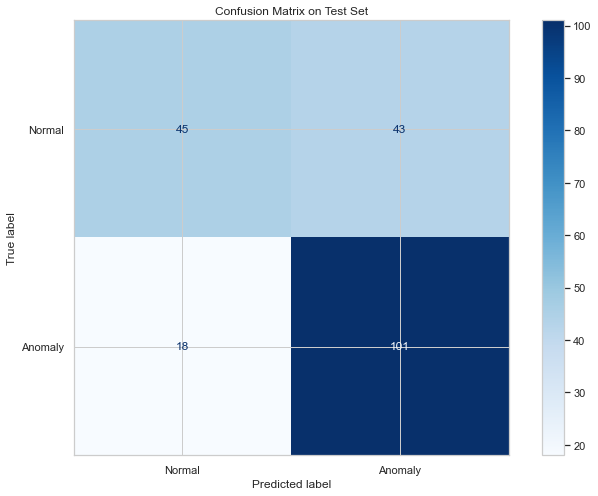

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# classify test set
y_pred_test = (agg_score_test < best_thresh).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# show confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Anomaly"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix on Test Set")
plt.show()